In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
pip install --upgrade category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [43]:
#importing datasets  
data_set= pd.read_csv('/content/drive/MyDrive/ML Dataset/AninditaDataset.csv') 

In [44]:
x = data_set.drop(["Approved"], axis = 1)
y = data_set.Approved
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=10)

In [45]:
encoder = ce.OrdinalEncoder(cols=x.columns)
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)
encoder1 = ce.OrdinalEncoder(cols=["Approved"])
y_train = encoder1.fit_transform(y_train)
y_test = encoder1.fit_transform(y_test)

In [46]:
tree_model = tree.DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree_model.fit(x_train, y_train)
destn_tre_test_pred = tree_model.predict(x_test)
destn_tre_train_pred = tree_model.predict(x_train)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, destn_tre_test_pred)))
print('Training set score: {:.4f}'.format(tree_model.score(x_train, destn_tre_train_pred)))

Model accuracy score with criterion gini index: 0.2200
Training set score: 1.0000


[Text(0.5909090909090909, 0.875, 'X[9] <= 8.5\ngini = 0.323\nsamples = 750\nvalue = [152, 598]'),
 Text(0.36363636363636365, 0.625, 'X[5] <= 9.5\ngini = 0.251\nsamples = 652\nvalue = [96, 556]'),
 Text(0.18181818181818182, 0.375, 'X[5] <= 5.5\ngini = 0.372\nsamples = 381\nvalue = [94, 287]'),
 Text(0.09090909090909091, 0.125, 'gini = 0.07\nsamples = 219\nvalue = [8, 211]'),
 Text(0.2727272727272727, 0.125, 'gini = 0.498\nsamples = 162\nvalue = [86, 76]'),
 Text(0.5454545454545454, 0.375, 'X[12] <= 1.5\ngini = 0.015\nsamples = 271\nvalue = [2, 269]'),
 Text(0.45454545454545453, 0.125, 'gini = 0.0\nsamples = 251\nvalue = [0, 251]'),
 Text(0.6363636363636364, 0.125, 'gini = 0.18\nsamples = 20\nvalue = [2, 18]'),
 Text(0.8181818181818182, 0.625, 'X[12] <= 1.5\ngini = 0.49\nsamples = 98\nvalue = [56, 42]'),
 Text(0.7272727272727273, 0.375, 'gini = 0.0\nsamples = 42\nvalue = [0, 42]'),
 Text(0.9090909090909091, 0.375, 'gini = 0.0\nsamples = 56\nvalue = [56, 0]')]

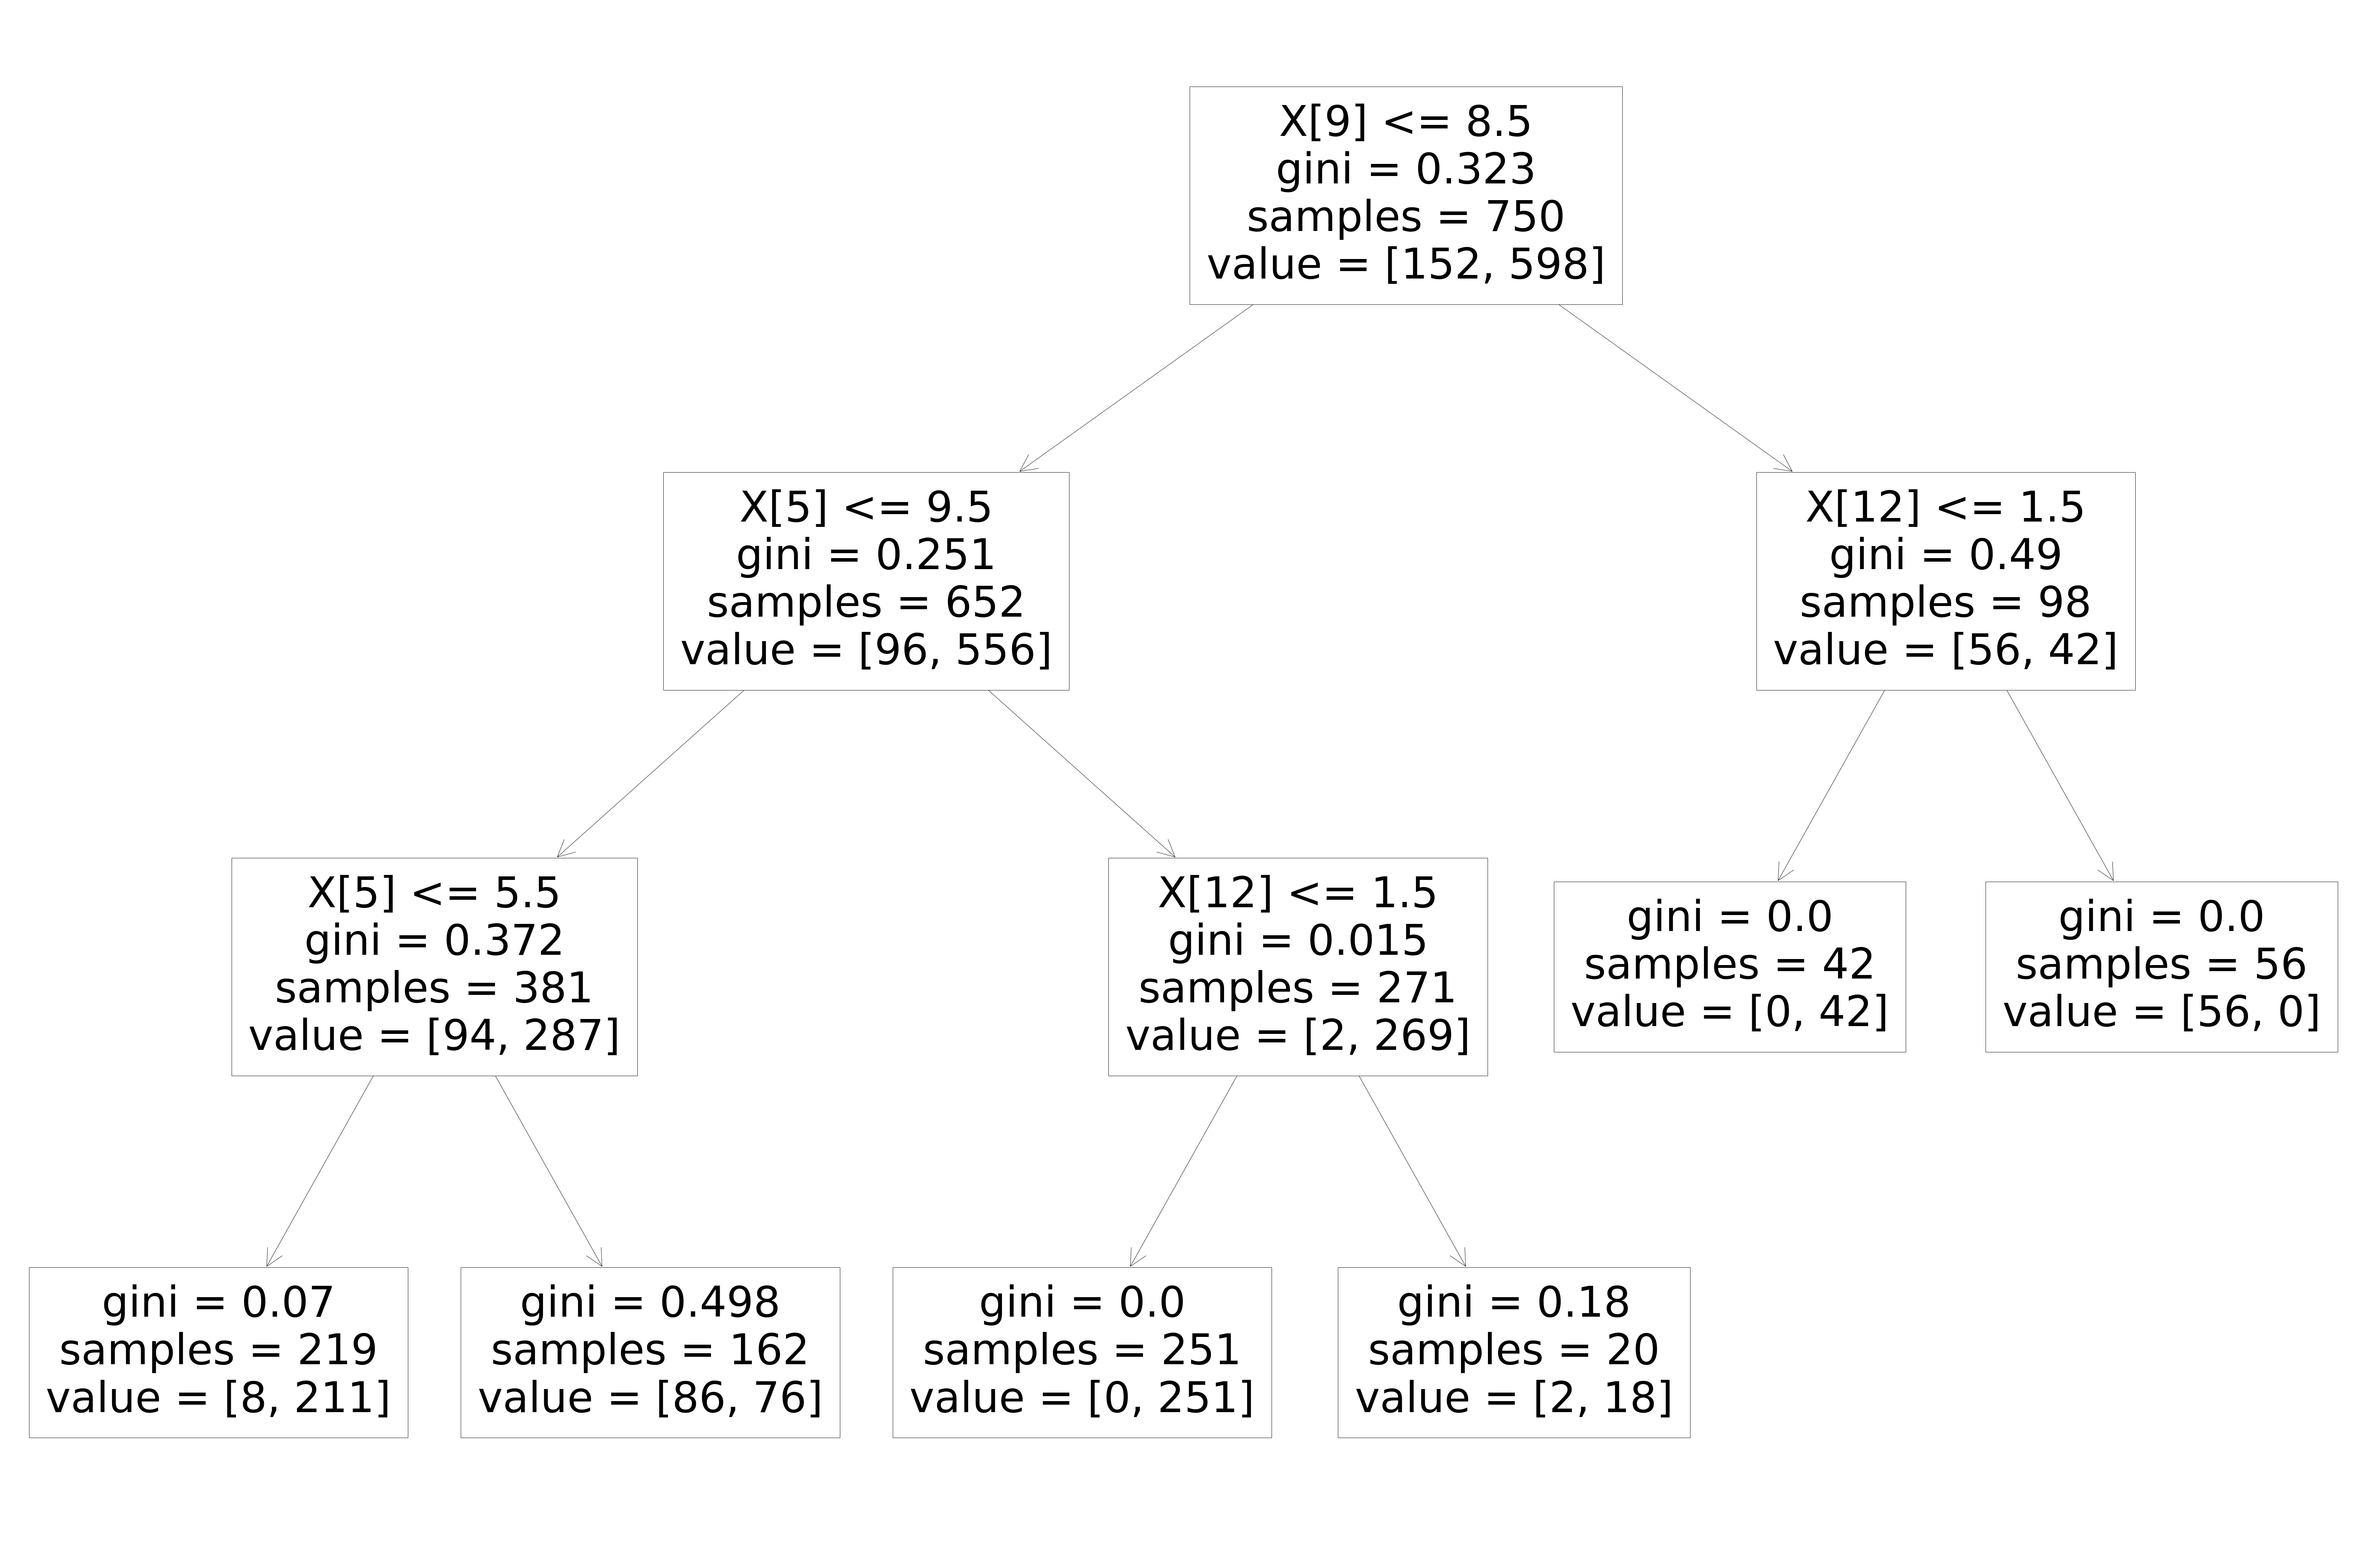

In [47]:
plt.figure(figsize=(120,80))
tree.plot_tree(tree_model.fit(x_train, destn_tre_train_pred))

In [48]:
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(x_train,y_train)
set_printoptions(precision=2)
print(fit.scores_)
featured_data = fit.transform(x_train)
print ("\nFeatured data:\n", featured_data[0:4])

[8.93e-02 5.62e-01 4.54e-01 1.66e-01 8.73e-01 8.46e+01 5.89e-01 2.01e+01
 5.18e-02 2.01e+01 8.22e-01 4.75e-01 2.85e+01]

Featured data:
 [[1 1 1 1]
 [2 2 2 1]
 [3 1 1 1]
 [3 3 3 1]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


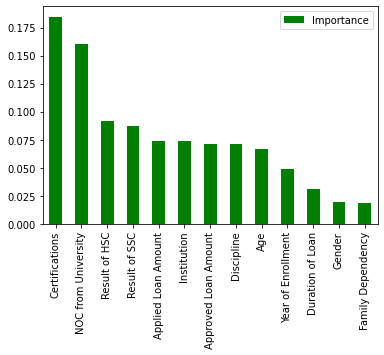

In [49]:
clf = RandomForestClassifier( n_estimators=50)
model = clf.fit(x_train,y_train)
feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', color = "green")

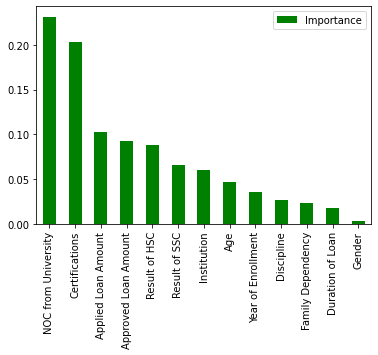

In [50]:
clf = DecisionTreeClassifier()
model = clf.fit(x_train,y_train)
feat_importances = pd.DataFrame(model.feature_importances_, index=x_train.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)
feat_importances.plot(kind='bar', color = "green")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[0.03 0.07 0.07 0.07 0.06 0.12 0.07 0.07 0.03 0.08 0.04 0.07 0.21]


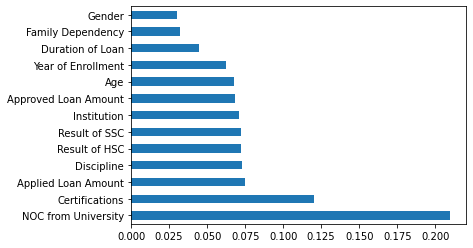

In [51]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(x_train,y_train)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()